In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy as hc
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Task 1

# Load the data.

In [7]:
df=pd.read_csv('DS2_C6_S2_CarSales_Data_Challenge.csv')
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


# reprocessing the data by droppin the year resale value feature and the missing values containing records.

In [8]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [9]:
df.shape

(157, 16)

In [10]:
df.drop(columns='__year_resale_value',axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        157 non-null    object 
 1   Model               157 non-null    object 
 2   Sales_in_thousands  157 non-null    float64
 3   Vehicle_type        157 non-null    object 
 4   Price_in_thousands  155 non-null    float64
 5   Engine_size         156 non-null    float64
 6   Horsepower          156 non-null    float64
 7   Wheelbase           156 non-null    float64
 8   Width               156 non-null    float64
 9   Length              156 non-null    float64
 10  Curb_weight         155 non-null    float64
 11  Fuel_capacity       156 non-null    float64
 12  Fuel_efficiency     154 non-null    float64
 13  Latest_Launch       157 non-null    object 
 14  Power_perf_factor   155 non-null    float64
dtypes: float64(11), object(4)
memory usage: 18.5+ KB


In [12]:
df.describe()

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [13]:
df.isnull().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    2
Engine_size           1
Horsepower            1
Wheelbase             1
Width                 1
Length                1
Curb_weight           2
Fuel_capacity         1
Fuel_efficiency       3
Latest_Launch         0
Power_perf_factor     2
dtype: int64

In [14]:
df=df.dropna()
df

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [15]:
#Label_Encoder()
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()
df['Manufacturer']=a.fit_transform(df['Manufacturer'])
df['Model']=a.fit_transform(df['Model'])
df['Vehicle_type']=a.fit_transform(df['Vehicle_type'])
df['Latest_Launch']=a.fit_transform(df['Latest_Launch'])


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 156
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        152 non-null    int32  
 1   Model               152 non-null    int32  
 2   Sales_in_thousands  152 non-null    float64
 3   Vehicle_type        152 non-null    int32  
 4   Price_in_thousands  152 non-null    float64
 5   Engine_size         152 non-null    float64
 6   Horsepower          152 non-null    float64
 7   Wheelbase           152 non-null    float64
 8   Width               152 non-null    float64
 9   Length              152 non-null    float64
 10  Curb_weight         152 non-null    float64
 11  Fuel_capacity       152 non-null    float64
 12  Fuel_efficiency     152 non-null    float64
 13  Latest_Launch       152 non-null    int32  
 14  Power_perf_factor   152 non-null    float64
dtypes: float64(11), int32(4)
memory usage: 16.6 KB


In [17]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df1=scale.fit_transform(df)
df=pd.DataFrame(df1,columns=df.columns)
df

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,-1.731004,0.065039,-0.530336,0.597614,-0.405800,-1.193989,-0.791180,-0.807785,-1.097174,-1.091782,-1.161844,-1.212659,0.969070,-0.442318,-0.734082
1,-1.731004,1.467461,-0.203388,0.597614,0.074328,0.143983,0.709634,0.089203,-0.228427,0.435008,0.221934,-0.193449,0.269868,0.749072,0.584374
2,-1.731004,0.846717,-0.651583,0.597614,1.020668,0.430691,0.444785,0.934192,0.090113,0.710575,0.746760,0.010393,-0.429335,-0.306933,0.585131
3,-1.613648,-1.544298,-0.479719,0.597614,-0.232537,-1.193989,-0.614614,-0.625788,-0.836550,-0.674708,-0.596040,-0.397291,0.736002,-1.173398,-0.554885
4,-1.613648,-1.521307,-0.503252,0.597614,0.460518,-0.238295,0.268218,0.167202,1.451150,0.367978,0.291280,0.137795,-0.429335,1.425998,0.313210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,1.672326,1.559423,-0.724977,0.597614,-0.204007,-1.098420,-0.438047,-0.898784,-1.010299,-0.778977,-0.526693,-0.550172,0.269868,1.561384,-0.406619
148,1.672326,1.076622,-0.554699,0.597614,0.011702,-0.620573,-0.296794,-0.326792,-0.518009,-0.086335,-0.265068,-0.015087,0.269868,-1.010936,-0.241041
149,1.672326,1.582413,-0.521430,0.597614,0.102161,-0.620573,-0.296794,-0.326792,-0.518009,-0.063992,-0.184689,-0.015087,0.269868,0.640764,-0.221060
150,1.672326,-1.176449,-0.725734,0.597614,1.264211,-0.716142,0.903857,-0.326792,0.119072,-0.101231,0.354322,0.137795,-0.196267,0.207531,0.992876


In [18]:
x=df
x

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,-1.731004,0.065039,-0.530336,0.597614,-0.405800,-1.193989,-0.791180,-0.807785,-1.097174,-1.091782,-1.161844,-1.212659,0.969070,-0.442318,-0.734082
1,-1.731004,1.467461,-0.203388,0.597614,0.074328,0.143983,0.709634,0.089203,-0.228427,0.435008,0.221934,-0.193449,0.269868,0.749072,0.584374
2,-1.731004,0.846717,-0.651583,0.597614,1.020668,0.430691,0.444785,0.934192,0.090113,0.710575,0.746760,0.010393,-0.429335,-0.306933,0.585131
3,-1.613648,-1.544298,-0.479719,0.597614,-0.232537,-1.193989,-0.614614,-0.625788,-0.836550,-0.674708,-0.596040,-0.397291,0.736002,-1.173398,-0.554885
4,-1.613648,-1.521307,-0.503252,0.597614,0.460518,-0.238295,0.268218,0.167202,1.451150,0.367978,0.291280,0.137795,-0.429335,1.425998,0.313210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,1.672326,1.559423,-0.724977,0.597614,-0.204007,-1.098420,-0.438047,-0.898784,-1.010299,-0.778977,-0.526693,-0.550172,0.269868,1.561384,-0.406619
148,1.672326,1.076622,-0.554699,0.597614,0.011702,-0.620573,-0.296794,-0.326792,-0.518009,-0.086335,-0.265068,-0.015087,0.269868,-1.010936,-0.241041
149,1.672326,1.582413,-0.521430,0.597614,0.102161,-0.620573,-0.296794,-0.326792,-0.518009,-0.063992,-0.184689,-0.015087,0.269868,0.640764,-0.221060
150,1.672326,-1.176449,-0.725734,0.597614,1.264211,-0.716142,0.903857,-0.326792,0.119072,-0.101231,0.354322,0.137795,-0.196267,0.207531,0.992876


# Task 2

# Compute the Dendogram to choose the number of clusters with threshold cut value.

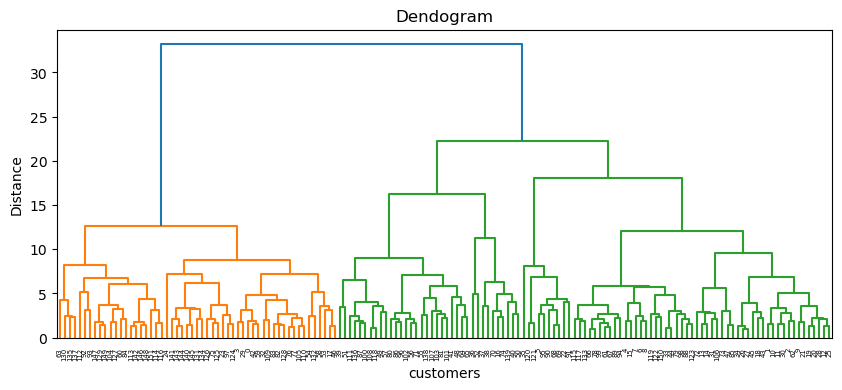

In [19]:
plt.figure(figsize=(10,4))
hc.dendrogram(hc.linkage(x,method='ward'))
plt.title('Dendogram')
plt.xlabel('customers')
plt.ylabel('Distance');

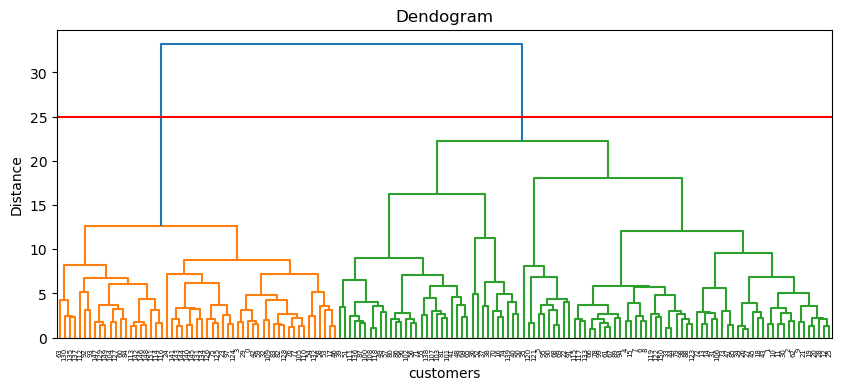

In [20]:
plt.figure(figsize=(10,4))
hc.dendrogram(hc.linkage(x,method='ward'))
plt.axhline(y=25,color='r')
plt.title('Dendogram')
plt.xlabel('customers')
plt.ylabel('Distance');

# Task 3

# Compute clustering using the Agglomerative clustering approach.Try different values for the linkages creteria.

In [21]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
for k in range(2,9):
    SAG=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='single')
    y_SAG=SAG.fit_predict(x)
    print(k,silhouette_score(x,y_SAG))


2 0.4716486866509823
3 0.4470911946553945
4 0.31814683086643986
5 0.24701633357989006
6 0.034257344578899125
7 -0.022181847352986724
8 -0.032261963576397414


In [22]:
for k in range(2,9):
    CAG=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='complete')
    y_CAG=CAG.fit_predict(x)
    print(k,silhouette_score(x,y_CAG))
    

2 0.24135332908616564
3 0.21583265472716923
4 0.18445715851147296
5 0.17123924184135458
6 0.12180815172561314
7 0.12375128089183322
8 0.12397892506125645


In [23]:
for k in range(2,9):
    AAG=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='average')
    y_AAG=AAG.fit_predict(x)
    print(k,silhouette_score(x,y_AAG))

2 0.4438554941570077
3 0.3227183052496609
4 0.2601892609967384
5 0.2418209050778064
6 0.21826010461297662
7 0.13233825205691968
8 0.10807932471902333


In [24]:
for k in range(2,9):
    WAG=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    y_WAG=WAG.fit_predict(x)
    print(k,silhouette_score(x,y_WAG))

2 0.19271165138640478
3 0.184537283281229
4 0.17109477107932766
5 0.1877883612660518
6 0.15983681316354015
7 0.14587686379705786
8 0.15277439948477584


# Decide a setting that works well and interpret the cluster you obtain.

The Best K-Value is (K=2)

In [25]:
Single linkage is getting high silhouette_score value as compare to other linkages.

SyntaxError: invalid syntax (3593410469.py, line 1)

In [26]:
#method-2
for k in range(2,9):
    for i in ['single','complete','average','ward']:
        AG=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage=i)
        y_AG=AG.fit_predict(x)
        print(k,i,silhouette_score(x,y_AG))

2 single 0.4716486866509823
2 complete 0.24135332908616564
2 average 0.4438554941570077
2 ward 0.19271165138640478
3 single 0.4470911946553945
3 complete 0.21583265472716923
3 average 0.3227183052496609
3 ward 0.184537283281229
4 single 0.31814683086643986
4 complete 0.18445715851147296
4 average 0.2601892609967384
4 ward 0.17109477107932766
5 single 0.24701633357989006
5 complete 0.17123924184135458
5 average 0.2418209050778064
5 ward 0.1877883612660518
6 single 0.034257344578899125
6 complete 0.12180815172561314
6 average 0.21826010461297662
6 ward 0.15983681316354015
7 single -0.022181847352986724
7 complete 0.12375128089183322
7 average 0.13233825205691968
7 ward 0.14587686379705786
8 single -0.032261963576397414
8 complete 0.12397892506125645
8 average 0.10807932471902333
8 ward 0.15277439948477584


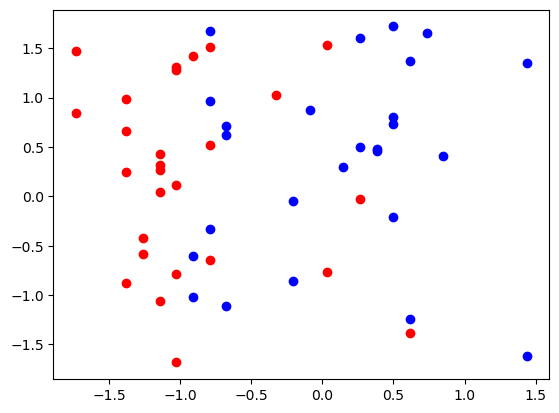

In [28]:
x=x.to_numpy()
plt.scatter(x[y_AG==0,0],x[y_AG==0,1],color='r')
plt.scatter(x[y_AG==1,0],x[y_AG==1,1],color='b');


# Task 4

# Visualize the all-possible paired feature cluster and data distribution.

In [29]:
from ipywidgets import interact
import seaborn as sns

In [34]:
def hierarchical(k=6,affinity='manhattan',linkage='complete',grid=False,column1=0,column2=1):
    y_AG=AgglomerativeClustering(n_clusters=k,affinity=affinity,linkage=linkage)
    y_AG=y_AG.fit_predict(x)
    colors = plt.cm.Spectral(np.linspace(0, 1,k))
    print('The Silhoutee Score is ',(silhouette_score(x,y_AG)))
    b=df.to_numpy()
    for i,c  in zip(np.unique(y_AG),colors):
        plt.scatter(b[y_AG==i,column1],b[y_AG==i,column2],color=c)
        plt.tight_layout()
    
    plt.grid(grid)
    plt.show()
import ipywidgets
ipywidgets.interact(hierarchical,k=(3,5,1),column1=(0,12,1),column2=(0,12,1),linkage=['ward','complete','single','average'],grid=False,affinity=['euclidean','l1','l2','manhattan','cosine','precomputed'])

interactive(children=(IntSlider(value=5, description='k', max=5, min=3), Dropdown(description='affinity', inde…

<function __main__.hierarchical(k=6, affinity='manhattan', linkage='complete', grid=False, column1=0, column2=1)>